In [1]:
import pyspedas
import pytplot
from pytplot import tplot, options, tlimit, tplot_names
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
import datetime
import netCDF4
from netCDF4 import Dataset, num2date
import datetime as dt

## Probe (a)

In [2]:
pyspedas.rbsp.rept(trange=['2015-9-7', '2015-9-8'], probe = 'a', level='l3', rel='rel03', time_clip = True)


from pytplot import get_data

data_a = get_data('FEDU')

26-Sep-23 20:52:39: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspa/l3/ect/rept/sectors/rel03/2015/
26-Sep-23 20:52:51: File is current: rbsp_data/rbspa/l3/ect/rept/sectors/rel03/2015/rbspa_rel03_ect-rept-sci-l3_20150907_v5.0.0.cdf
26-Sep-23 20:52:51: No VAR_TYPE or PARAMETER_TYPE attributes defined for variable FEDU_Unbinned_Sector_Angle, skipping
26-Sep-23 20:52:51: No VAR_TYPE or PARAMETER_TYPE attributes defined for variable FPDU_Unbinned_Sector_Angle, skipping
26-Sep-23 20:52:56: Length of v (1) and x (7751) do not match.  Cannot create tplot variable FPDU.
26-Sep-23 20:52:56: FPDU is currently not in pytplot.
26-Sep-23 20:52:56: FPDU is currently not in pytplot.
26-Sep-23 20:52:56: FPDU is currently not in pytplot.
26-Sep-23 20:52:56: FPDU is currently not in pytplot.
26-Sep-23 20:52:56: Length of v (1) and x (7751) do not match.  Cannot create tplot variable FPDU_0to180.
26-Sep-23 20:52:56: FPDU_0to180 is currently not in pytplot.
26-Sep-23 20:52:56: FPD

In [3]:
# for rept variables, creating new variables for the subplot
fedu=pytplot.data_quants['FEDU'].values
time=pytplot.data_quants['FEDU'].coords['time'].values
L=pytplot.data_quants['L'].values


In [4]:
time

array(['2015-09-07T00:00:03.981000000', '2015-09-07T00:00:15.121000000',
       '2015-09-07T00:00:26.261000000', ...,
       '2015-09-07T23:59:11.979000000', '2015-09-07T23:59:23.119000000',
       '2015-09-07T23:59:34.259000000'], dtype='datetime64[ns]')

In [14]:
import numpy as np
import datetime


# Convert the NumPy array to a list of Python datetime.datetime objects
datetime_list = [t.item() for t in time]

# datetime_list

In [15]:
import datetime
import numpy as np
import pytz  

# Initialize an empty list to store datetime objects
dt_datetime_list = []

# Iterate through each timestamp in the list
for dt in datetime_list:
    # Check if 'dt' is a numeric type
    if isinstance(dt, (int, float, np.integer, np.float)):
        # Convert nanoseconds to seconds
        dt_seconds = dt / 1e9
        
        # Convert the timestamp to a Python datetime.datetime object
        dt_datetime = datetime.datetime.fromtimestamp(dt_seconds, tz=pytz.UTC)
        
        dt_datetime_list.append(dt_datetime)
    else:
        print("Skipping non-numeric timestamp value:", dt)

##
for dt in dt_datetime_list:
    print(dt)


26-Sep-23 20:55:01: C:\Users\sians\AppData\Local\Temp\ipykernel_16868\2057363556.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(dt, (int, float, np.integer, np.float)):



2015-09-07 00:00:03.981000+00:00
2015-09-07 00:00:15.121000+00:00
2015-09-07 00:00:26.261000+00:00
2015-09-07 00:00:37.400000+00:00
2015-09-07 00:00:48.540000+00:00
2015-09-07 00:00:59.680000+00:00
2015-09-07 00:01:10.820000+00:00
2015-09-07 00:01:21.960000+00:00
2015-09-07 00:01:33.099000+00:00
2015-09-07 00:01:44.239000+00:00
2015-09-07 00:01:55.379000+00:00
2015-09-07 00:02:06.519000+00:00
2015-09-07 00:02:17.658000+00:00
2015-09-07 00:02:28.798000+00:00
2015-09-07 00:02:39.938000+00:00
2015-09-07 00:02:51.078000+00:00
2015-09-07 00:03:02.217000+00:00
2015-09-07 00:03:13.357000+00:00
2015-09-07 00:03:24.497000+00:00
2015-09-07 00:03:35.637000+00:00
2015-09-07 00:03:46.776000+00:00
2015-09-07 00:03:57.916000+00:00
2015-09-07 00:04:09.056000+00:00
2015-09-07 00:04:20.196000+00:00
2015-09-07 00:04:31.336000+00:00
2015-09-07 00:04:42.475000+00:00
2015-09-07 00:04:53.615000+00:00
2015-09-07 00:05:04.755000+00:00
2015-09-07 00:05:15.895000+00:00
2015-09-07 00:05:27.034000+00:00
2015-09-07

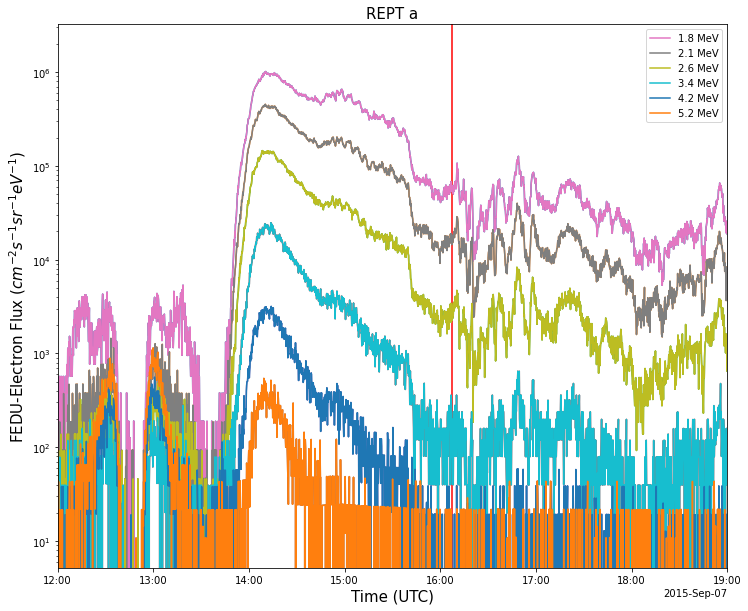

In [16]:
import datetime
import numpy as np
import matplotlib.pyplot as plt

# Convert list of datetime objects to a NumPy array
dt_datetime_list = np.array(dt_datetime_list)

start_date = datetime.datetime(2015, 9, 7, 12, 0, 0)
end_date = datetime.datetime(2015, 9, 7, 19, 0, 0)
line_date = datetime.datetime(2015, 9, 7, 16, 7, 0)

fig, ax1 = plt.subplots(figsize=(12, 10))
ax1.semilogy(dt_datetime_list, data_a.y[:, 8, 0:6])
ax1.set_xlim(start_date, end_date)
ax1.axvline(x=line_date, color='r')

ax1.set_xlabel('Time (UTC)', fontsize=15)
ax1.set_ylabel('FEDU-Electron Flux ($cm^{-2}$$s^{-1}$$sr^{-1}$$eV^{-1}$)', fontsize=15)

ax1.plot(dt_datetime_list, data_a.y[:, 8, 0:6], label=['1.8 MeV', '2.1 MeV', '2.6 MeV', '3.4 MeV', '4.2 MeV', '5.2 MeV'])

ax1.set_title('REPT a', fontsize=15)


ax1.legend()

plt.show()  


## Probe (b)

In [17]:
pyspedas.rbsp.rept(trange=['2015-9-7', '2015-9-8'], probe = 'b', level='l3', rel='rel03', time_clip = True)


from pytplot import get_data

data_b = get_data('FEDU')

26-Sep-23 20:55:41: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspb/l3/ect/rept/sectors/rel03/2015/
26-Sep-23 20:55:52: File is current: rbsp_data/rbspb/l3/ect/rept/sectors/rel03/2015/rbspb_rel03_ect-rept-sci-l3_20150907_v5.0.0.cdf
26-Sep-23 20:55:52: No VAR_TYPE or PARAMETER_TYPE attributes defined for variable FEDU_Unbinned_Sector_Angle, skipping
26-Sep-23 20:55:52: No VAR_TYPE or PARAMETER_TYPE attributes defined for variable FPDU_Unbinned_Sector_Angle, skipping
26-Sep-23 20:55:56: Length of v (1) and x (7880) do not match.  Cannot create tplot variable FPDU.
26-Sep-23 20:55:56: FPDU is currently not in pytplot.
26-Sep-23 20:55:56: FPDU is currently not in pytplot.
26-Sep-23 20:55:56: FPDU is currently not in pytplot.
26-Sep-23 20:55:56: FPDU is currently not in pytplot.
26-Sep-23 20:55:56: Length of v (1) and x (7880) do not match.  Cannot create tplot variable FPDU_0to180.
26-Sep-23 20:55:56: FPDU_0to180 is currently not in pytplot.
26-Sep-23 20:55:56: FPD

In [18]:
# for rept variables, creating new variables for the subplot
fedu_b=pytplot.data_quants['FEDU'].values
time_b=pytplot.data_quants['FEDU'].coords['time'].values
L_b=pytplot.data_quants['L'].values


In [19]:
time_b


array(['2015-09-07T00:00:09.825000000', '2015-09-07T00:00:20.781000000',
       '2015-09-07T00:00:31.736000000', ...,
       '2015-09-07T23:58:47.714000000', '2015-09-07T23:58:58.670000000',
       '2015-09-07T23:59:09.626000000'], dtype='datetime64[ns]')

In [21]:
import numpy as np
import datetime


# Convert the NumPy array to a list of Python datetime.datetime objects
datetime_list_b = [t.item() for t in time_b]

# datetime_list_b

In [22]:
import datetime
import numpy as np
import pytz  

dt_datetime_list_b = []

# Iterate through each timestamp in the list
for dt in datetime_list_b:
    # Check if 'dt' is a numeric type
    if isinstance(dt, (int, float, np.integer, np.float)):
        # Convert nanoseconds to seconds
        dt_seconds = dt / 1e9
        
        # Convert the timestamp to a datetime.datetime object
        dt_datetime_b = datetime.datetime.fromtimestamp(dt_seconds, tz=pytz.UTC)
        
        dt_datetime_list_b.append(dt_datetime_b)
    else:
        print("Skipping non-numeric timestamp value:", dt)

##
for dt in dt_datetime_list_b:
    print(dt)


26-Sep-23 20:56:39: C:\Users\sians\AppData\Local\Temp\ipykernel_16868\105827915.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(dt, (int, float, np.integer, np.float)):



2015-09-07 00:00:09.825000+00:00
2015-09-07 00:00:20.781000+00:00
2015-09-07 00:00:31.736000+00:00
2015-09-07 00:00:42.691000+00:00
2015-09-07 00:00:53.647000+00:00
2015-09-07 00:01:04.603000+00:00
2015-09-07 00:01:15.558000+00:00
2015-09-07 00:01:26.514000+00:00
2015-09-07 00:01:37.469000+00:00
2015-09-07 00:01:48.425000+00:00
2015-09-07 00:01:59.381000+00:00
2015-09-07 00:02:10.336000+00:00
2015-09-07 00:02:21.292000+00:00
2015-09-07 00:02:32.248000+00:00
2015-09-07 00:02:43.203000+00:00
2015-09-07 00:02:54.158000+00:00
2015-09-07 00:03:05.114000+00:00
2015-09-07 00:03:16.070000+00:00
2015-09-07 00:03:27.025000+00:00
2015-09-07 00:03:37.981000+00:00
2015-09-07 00:03:48.937000+00:00
2015-09-07 00:03:59.892000+00:00
2015-09-07 00:04:10.848000+00:00
2015-09-07 00:04:21.804000+00:00
2015-09-07 00:04:32.759000+00:00
2015-09-07 00:04:43.714000+00:00
2015-09-07 00:04:54.670000+00:00
2015-09-07 00:05:05.626000+00:00
2015-09-07 00:05:16.581000+00:00
2015-09-07 00:05:27.536000+00:00
2015-09-07

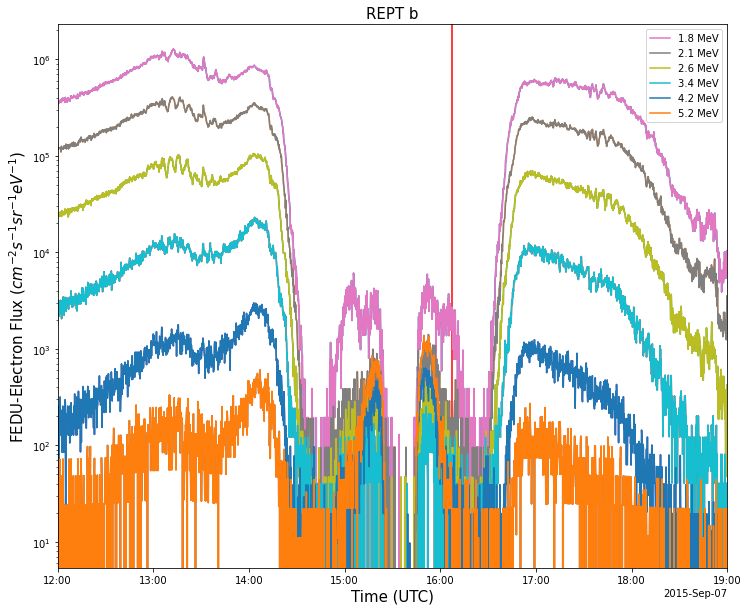

In [23]:
import datetime
import numpy as np
import matplotlib.pyplot as plt

dt_datetime_list_b = np.array(dt_datetime_list_b)

start_date = datetime.datetime(2015, 9, 7, 12, 0, 0)
end_date = datetime.datetime(2015, 9, 7, 19, 0, 0)
line_date = datetime.datetime(2015, 9, 7, 16, 7, 0)


fig, ax2 = plt.subplots(figsize=(12, 10))
ax2.semilogy(dt_datetime_list_b, data_b.y[:, 8, 0:6])
ax2.set_xlim(start_date, end_date)
ax2.axvline(x=line_date, color='r')

ax2.set_xlabel('Time (UTC)', fontsize=15)
ax2.set_ylabel('FEDU-Electron Flux ($cm^{-2}$$s^{-1}$$sr^{-1}$$eV^{-1}$)', fontsize=15)

ax2.plot(dt_datetime_list_b, data_b.y[:, 8, 0:6], label=['1.8 MeV', '2.1 MeV', '2.6 MeV', '3.4 MeV', '4.2 MeV', '5.2 MeV'])

ax2.set_title('REPT b', fontsize=15)


ax2.legend()

plt.show()  
